# Soil_Physics_Semester_Project_codes

### Simple Energy Balance Model for Predicting Canopy Temperature

# Import Libraries

In [15]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Define all Constants and Importing dataset and calculate  

In [16]:
# Constants
ML = 2  # Leaf mass per unit projected surface area (g/m^2)
Cl = 4197  # Leaf specific heat capacity (J/kg*K)
ALBEDO = 0.2
STEFB = 5.67e-8  # Stefan-Boltzmann constant (W/m^2*K^4)
EMISS = 0.95  # Long-wave emissivity of atmosphere
BOWEN = 0.5  # Bowen Ratio
DELT = 15 * 60  # Time step (s)

# Load dataset
data = pd.read_csv("Dataset_for_SP.csv")  # Load dataset
data['DateTime'] = pd.to_datetime(data['DateTime'])  # Convert 'DateTime' column to datetime format
data = data.set_index('DateTime')

# Function to calculate net radiation
def calculate_net_radiation(SRAD, TLEAF, TAIR):
    RSW = SRAD
    RSZABS = (1 - ALBEDO) * RSW
    RLWIN = EMISS * STEFB * (TAIR ** 4)
    RLWOUT = STEFB * (TLEAF ** 4)
    RNET = RSZABS - RLWOUT + RLWIN
    return RNET

# Function to calculate sensible heat flux
def calculate_sensible_heat_flux(K, TLEAF, TAIR):
    H = K * (TLEAF - TAIR)
    return H

# Function to calculate latent heat flux
def calculate_latent_heat_flux(H):
    LE = H / BOWEN
    return LE

# Function to calculate rate of change of leaf temperature
def calculate_temperature_change(RNET, H, LE):
    DTLDT = (1.0 / (ML * Cl)) * (RNET - H - LE)
    return DTLDT

# Initialize a list to store the predicted leaf temperatures for each time step
predicted_CT_values = []

# Loop over each day in the dataset
for i in range(0, len(data), 96):  # Assuming data has 96 rows per day (15-minute intervals)
    daily_data = data.iloc[i:i+96]  # Select data for one day
    TLEAF = 297.65  # Initial leaf temperature to test
    TAIR = 298.15  # Initial air temperature
    
    for index, row in daily_data.iterrows():
        SRAD = row['SRAD']
        TAIR = row['TAIR']

        # Calculate net radiation
        RNET = calculate_net_radiation(SRAD, TLEAF, TAIR)

        # Calculate sensible heat flux
        K = 3.0  # Example value
        H = calculate_sensible_heat_flux(K, TLEAF, TAIR)

        # Calculate latent heat flux
        LE = calculate_latent_heat_flux(H)

        # Calculate temperature change
        DTLDT = calculate_temperature_change(RNET, H, LE)

        # Update leaf temperature
        TLEAF += DELT * DTLDT
        
        # Store the predicted leaf temperature for the current time step
        predicted_CT_values.append(TLEAF)

# Extract the actual leaf temperatures (CT) from the dataset
actual_CT_values = data['CT'].values

# Compare the predicted and actual leaf temperatures
for idx, (predicted_CT, actual_CT) in enumerate(zip(predicted_CT_values, actual_CT_values)):
    print(f"Time Step {idx + 1}: Predicted CT = {predicted_CT}, Actual CT = {actual_CT}")

Time Step 1: Predicted CT = 296.0519658699963, Actual CT = 297.65
Time Step 2: Predicted CT = 297.01252719001866, Actual CT = 297.55
Time Step 3: Predicted CT = 296.4371129236492, Actual CT = 297.75
Time Step 4: Predicted CT = 296.782519521188, Actual CT = 297.85
Time Step 5: Predicted CT = 296.57543587562077, Actual CT = 297.65
Time Step 6: Predicted CT = 295.7544409119418, Actual CT = 297.45
Time Step 7: Predicted CT = 296.24431700152627, Actual CT = 297.25
Time Step 8: Predicted CT = 295.95253393012223, Actual CT = 297.25
Time Step 9: Predicted CT = 296.12651229719, Actual CT = 297.45
Time Step 10: Predicted CT = 296.0228416284211, Actual CT = 297.45
Time Step 11: Predicted CT = 296.08464046802544, Actual CT = 297.35
Time Step 12: Predicted CT = 295.2617969742852, Actual CT = 297.35
Time Step 13: Predicted CT = 295.75019130750707, Actual CT = 297.35
Time Step 14: Predicted CT = 295.46082844039495, Actual CT = 297.05
Time Step 15: Predicted CT = 295.63245298097, Actual CT = 296.95
Ti

In [17]:

# Open a CSV file named "leaf_temperatures.csv" in write mode
with open("leaf_temperatures.csv", "w", newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)
    
    # Write header
    writer.writerow(["DateTime", "Actual_CT", "Predicted_CT"])
    
    # Write data
    for idx, (actual_CT, predicted_CT) in enumerate(zip(actual_CT_values, predicted_CT_values)):
        date_time = data.index[idx]
        writer.writerow([date_time, actual_CT, predicted_CT])

print("Data saved to leaf_temperatures.csv")


Data saved to leaf_temperatures.csv


# Plot actual vs predicted CT with datetime on x-axis

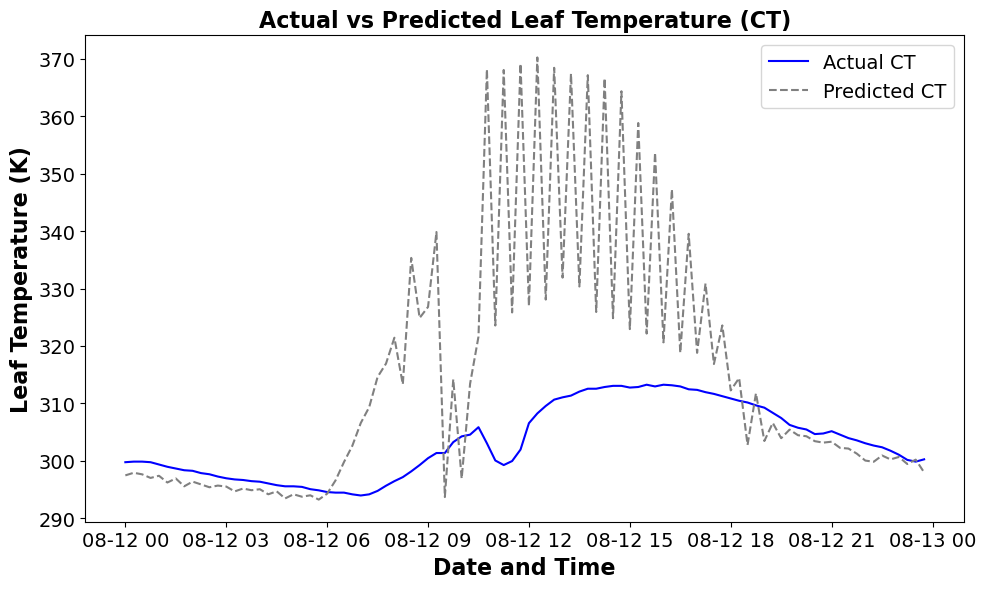

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, actual_CT_values, label='Actual CT', color='blue')
plt.plot(data.index, predicted_CT_values, label='Predicted CT', linestyle='--', color='gray')
plt.xlabel('Date and Time', weight='bold', fontsize='16')
plt.ylabel('Leaf Temperature (K)', weight='bold', fontsize='16')
plt.title('Actual vs Predicted Leaf Temperature (CT)', weight='bold', fontsize='16')
plt.legend(fontsize='14')
plt.grid(False)
plt.xticks(rotation=0,fontsize='14') 
plt.yticks(fontsize='14')
plt.tight_layout()
plt.show()
